#**Reproducible Research (Jupyter Notebook Version)**
by Lena Horsley

This is the Juypter Notebook version of my final project for the Coursera class Reproducible Research. [Reproducible Research](https://www.coursera.org/learn/reproducible-research?specialization=jhu-data-science) is the fifth course in the [Johns Hopkins Data Science specialization](https://www.coursera.org/specializations/jhu-data-science).

My final project can be found [here](https://github.com/LegoBatmanFan/r_programming/tree/master/005_reproducible-research).

In [1]:
import pandas as pd
import shutil
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
from plotnine import *
from matplotlib import dates

In [2]:
!wget http://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip

--2022-04-04 01:34:39--  http://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 13.225.141.216, 13.225.141.186, 13.225.141.160, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|13.225.141.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53559 (52K) [application/zip]
Saving to: ‘repdata%2Fdata%2Factivity.zip’

repdata%2Fdata%2Fac 100%[===================>]  52.30K  --.-KB/s    in 0.1s    

2022-04-04 01:34:39 (416 KB/s) - ‘repdata%2Fdata%2Factivity.zip’ saved [53559/53559]



In [3]:
!unzip 'repdata%2Fdata%2Factivity.zip'

Archive:  repdata%2Fdata%2Factivity.zip
  inflating: activity.csv            


In [4]:
raw_total_data = pd.read_csv('activity.csv')
raw_total_data.head

<bound method NDFrame.head of        steps        date  interval
0        NaN  2012-10-01         0
1        NaN  2012-10-01         5
2        NaN  2012-10-01        10
3        NaN  2012-10-01        15
4        NaN  2012-10-01        20
...      ...         ...       ...
17563    NaN  2012-11-30      2335
17564    NaN  2012-11-30      2340
17565    NaN  2012-11-30      2345
17566    NaN  2012-11-30      2350
17567    NaN  2012-11-30      2355

[17568 rows x 3 columns]>

In [5]:
raw_total_data1 = raw_total_data.dropna(axis=0, subset=['steps'])
raw_total_data1.head

<bound method NDFrame.head of        steps        date  interval
288      0.0  2012-10-02         0
289      0.0  2012-10-02         5
290      0.0  2012-10-02        10
291      0.0  2012-10-02        15
292      0.0  2012-10-02        20
...      ...         ...       ...
17275    0.0  2012-11-29      2335
17276    0.0  2012-11-29      2340
17277    0.0  2012-11-29      2345
17278    0.0  2012-11-29      2350
17279    0.0  2012-11-29      2355

[15264 rows x 3 columns]>

In [6]:
raw_total_data1["steps1"] = raw_total_data1["steps"].astype('int')
raw_total_data1["interval1"] = raw_total_data1["interval"].astype('int')
raw_total_data1["date1"] = raw_total_data1["date"].astype('datetime64[ns]')
raw_total_data1.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<bound method NDFrame.head of        steps        date  interval  steps1  interval1      date1
288      0.0  2012-10-02         0       0          0 2012-10-02
289      0.0  2012-10-02         5       0          5 2012-10-02
290      0.0  2012-10-02        10       0         10 2012-10-02
291      0.0  2012-10-02        15       0         15 2012-10-02
292      0.0  2012-10-02        20       0         20 2012-10-02
...      ...         ...       ...     ...        ...        ...
17275    0.0  2012-11-29      2335       0       2335 2012-11-29
17276    0.0  2012-11-29      2340       0       2340 2012-11-29
17277    0.0  2012-11-29      2345       0       2345 2012-11-29
17278    0.0  2012-11-29      2350       0       2350 2012-11-29
17279    0.0  2012-11-29      2355       0       2355 2012-11-29

[15264 rows x 6 columns]>

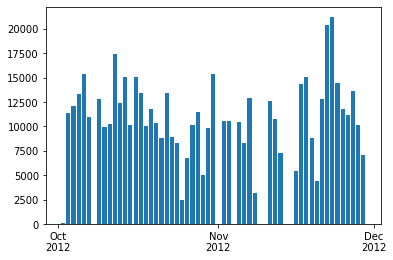

In [7]:
#raw_total_data2 = raw_total_data1.filter(regex="date1|steps1")
raw_total_data2 = raw_total_data1.groupby(['date1'],as_index=False).agg(lambda x : x.sum() if x.dtype=='int' else x.head(1))
raw_total_data2
#raw_total_data1 = raw_total_data1.groupby(['date1'],as_index=False).agg(lambda x : x.sum() if x.dtype=='int' else x.head(1))
#raw_total_data1
plt.bar(raw_total_data2.date1, raw_total_data2.steps1)
plt.gca().xaxis.set_major_locator(dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
plt.show()

In [8]:
raw_total_data2["steps1"].mean()

10766.188679245282

In [9]:
raw_total_data4 = raw_total_data1.filter(regex="interval1|steps1")
raw_total_data5 = raw_total_data4.groupby(['interval1'],as_index=False).agg(lambda x : x.mean() if x.dtype=='int' else x.head(1))
raw_total_data5.head

<bound method NDFrame.head of      interval1    steps1
0            0  1.716981
1            5  0.339623
2           10  0.132075
3           15  0.150943
4           20  0.075472
..         ...       ...
283       2335  4.698113
284       2340  3.301887
285       2345  0.641509
286       2350  0.226415
287       2355  1.075472

[288 rows x 2 columns]>

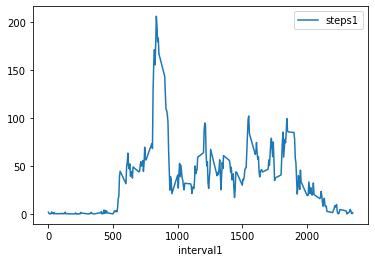

In [10]:
raw_total_data5.plot(x="interval1", y="steps1", kind="line")

In [11]:
raw_total_data5[raw_total_data5['steps1']==raw_total_data5['steps1'].max()]

,interval1,steps1
103,835,206.169811


In [12]:
raw_total_data.isna().values.sum()

2304

Devise a strategy for filling in all of the missing values in the dataset. The strategy does not need to be sophisticated. For example, you could use the mean/median for that day, or the mean for that 5-minute interval, etc. Create a new dataset that is equal to the original dataset but with the missing data filled in.  
<br>
Method 1: the simplest thing to do - change the NA values to 0


In [13]:
raw_total_data.head

<bound method NDFrame.head of        steps        date  interval
0        NaN  2012-10-01         0
1        NaN  2012-10-01         5
2        NaN  2012-10-01        10
3        NaN  2012-10-01        15
4        NaN  2012-10-01        20
...      ...         ...       ...
17563    NaN  2012-11-30      2335
17564    NaN  2012-11-30      2340
17565    NaN  2012-11-30      2345
17566    NaN  2012-11-30      2350
17567    NaN  2012-11-30      2355

[17568 rows x 3 columns]>

In [14]:
zeroesInMyData = raw_total_data.copy()
zeroesInMyData = zeroesInMyData.fillna(0)
zeroesInMyData["steps1"] = zeroesInMyData["steps"].astype('int')
zeroesInMyData["interval1"] = zeroesInMyData["interval"].astype('int')
zeroesInMyData["date1"] = zeroesInMyData["date"].astype('datetime64[ns]')
zeroesInMyData.head
#zeroesInMyData1 = zeroesInMyData.filter(regex="date|steps")
#zeroesInMyData1["steps1"] = zeroesInMyData1["steps"].astype('int')
#zeroesInMyData2 = zeroesInMyData1.groupby(['date'],as_index=False).agg(lambda x : x.sum() if x.dtype=='int' else x.head(1))
#zeroesInMyData2.head
#zeroesInMyData1.plot(x="date", y="steps1", kind="bar")

<bound method NDFrame.head of        steps        date  interval  steps1  interval1      date1
0        0.0  2012-10-01         0       0          0 2012-10-01
1        0.0  2012-10-01         5       0          5 2012-10-01
2        0.0  2012-10-01        10       0         10 2012-10-01
3        0.0  2012-10-01        15       0         15 2012-10-01
4        0.0  2012-10-01        20       0         20 2012-10-01
...      ...         ...       ...     ...        ...        ...
17563    0.0  2012-11-30      2335       0       2335 2012-11-30
17564    0.0  2012-11-30      2340       0       2340 2012-11-30
17565    0.0  2012-11-30      2345       0       2345 2012-11-30
17566    0.0  2012-11-30      2350       0       2350 2012-11-30
17567    0.0  2012-11-30      2355       0       2355 2012-11-30

[17568 rows x 6 columns]>

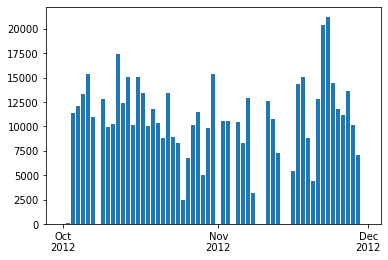

In [15]:
zeroesInMyData2 = zeroesInMyData.groupby(['date1'],as_index=False).agg(lambda x : x.sum() if x.dtype=='int' else x.head(1))
plt.bar(zeroesInMyData2.date1, zeroesInMyData2.steps1)
plt.gca().xaxis.set_major_locator(dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
plt.show()

In [16]:
zeroesInMyData2["steps1"].mean()

9354.22950819672

In [17]:
zeroesInMyData2["steps1"].median()

10395.0

Method 2: change the NA value for the 5 minute interval to the mean of the 5 minute interval

In [18]:
meanIntervalForNAData = raw_total_data.copy()
meanIntervalForNAData.head

<bound method NDFrame.head of        steps        date  interval
0        NaN  2012-10-01         0
1        NaN  2012-10-01         5
2        NaN  2012-10-01        10
3        NaN  2012-10-01        15
4        NaN  2012-10-01        20
...      ...         ...       ...
17563    NaN  2012-11-30      2335
17564    NaN  2012-11-30      2340
17565    NaN  2012-11-30      2345
17566    NaN  2012-11-30      2350
17567    NaN  2012-11-30      2355

[17568 rows x 3 columns]>

In [19]:
m = meanIntervalForNAData.mean(axis=1)
for i, col in enumerate(meanIntervalForNAData):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    # df.iloc[:, i].fillna(m, inplace=True)
    meanIntervalForNAData.iloc[:, i] = meanIntervalForNAData.iloc[:, i].fillna(meanIntervalForNAData.interval[i].mean())

meanIntervalForNAData.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<bound method NDFrame.head of        steps        date  interval
0        0.0  2012-10-01         0
1        0.0  2012-10-01         5
2        0.0  2012-10-01        10
3        0.0  2012-10-01        15
4        0.0  2012-10-01        20
...      ...         ...       ...
17563    0.0  2012-11-30      2335
17564    0.0  2012-11-30      2340
17565    0.0  2012-11-30      2345
17566    0.0  2012-11-30      2350
17567    0.0  2012-11-30      2355

[17568 rows x 3 columns]>

In [20]:
type(meanIntervalForNAData["interval"][0])

numpy.int64

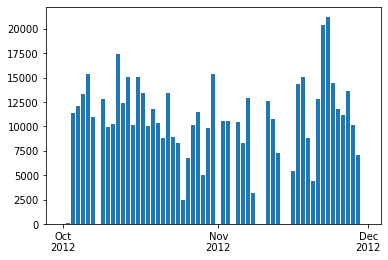

In [21]:
meanIntervalForNAData["steps1"] = meanIntervalForNAData["steps"].astype('int')
#meanIntervalForNAData["interval1"] = meanIntervalForNAData["interval"].astype('int')
meanIntervalForNAData["date1"] = meanIntervalForNAData["date"].astype('datetime64[ns]')
meanIntervalForNAData2 = meanIntervalForNAData.groupby(['date1'],as_index=False).agg(lambda x : x.sum() if x.dtype=='int' else x.head(1))
plt.bar(meanIntervalForNAData2.date1, meanIntervalForNAData2.steps1)
plt.gca().xaxis.set_major_locator(dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
plt.show()

In [22]:
meanIntervalForNAData2["steps1"].mean()

9354.22950819672

In [23]:
meanIntervalForNAData2["steps1"].median()

10395.0

In [24]:
meanIntervalForNAData['day_of_week'] = meanIntervalForNAData['date1'].dt.day_name()
meanIntervalForNAData.head

<bound method NDFrame.head of        steps        date  interval  steps1      date1 day_of_week
0        0.0  2012-10-01         0       0 2012-10-01      Monday
1        0.0  2012-10-01         5       0 2012-10-01      Monday
2        0.0  2012-10-01        10       0 2012-10-01      Monday
3        0.0  2012-10-01        15       0 2012-10-01      Monday
4        0.0  2012-10-01        20       0 2012-10-01      Monday
...      ...         ...       ...     ...        ...         ...
17563    0.0  2012-11-30      2335       0 2012-11-30      Friday
17564    0.0  2012-11-30      2340       0 2012-11-30      Friday
17565    0.0  2012-11-30      2345       0 2012-11-30      Friday
17566    0.0  2012-11-30      2350       0 2012-11-30      Friday
17567    0.0  2012-11-30      2355       0 2012-11-30      Friday

[17568 rows x 6 columns]>

In [25]:
type(meanIntervalForNAData["day_of_week"][0])

str

In [26]:
weekend_meanIntervalForNAData1 = meanIntervalForNAData[meanIntervalForNAData["day_of_week"].str.contains("Sunday|Saturday")]
weekend_meanIntervalForNAData1


,steps,date,interval,steps1,date1,day_of_week
1440,0.0,2012-10-06,0,0,2012-10-06,Saturday
1441,0.0,2012-10-06,5,0,2012-10-06,Saturday
1442,0.0,2012-10-06,10,0,2012-10-06,Saturday
1443,0.0,2012-10-06,15,0,2012-10-06,Saturday
1444,0.0,2012-10-06,20,0,2012-10-06,Saturday
...,...,...,...,...,...,...
16123,176.0,2012-11-25,2335,176,2012-11-25,Sunday
16124,94.0,2012-11-25,2340,94,2012-11-25,Sunday
16125,26.0,2012-11-25,2345,26,2012-11-25,Sunday
16126,0.0,2012-11-25,2350,0,2012-11-25,Sunday


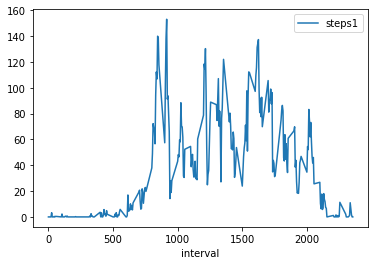

In [27]:
weekend_meanIntervalForNAData2 = weekend_meanIntervalForNAData1.groupby(['interval'],as_index=False).agg(lambda x : x.mean() if x.dtype=='int' else x.head(1))
weekend_meanIntervalForNAData2.plot(x="interval", y="steps1", kind="line")

In [28]:
weekday_meanIntervalForNAData1 = meanIntervalForNAData[meanIntervalForNAData["day_of_week"].str.contains("Monday|Tuesday|Wednesday|Thursday|Friday")]
weekday_meanIntervalForNAData1

,steps,date,interval,steps1,date1,day_of_week
0,0.0,2012-10-01,0,0,2012-10-01,Monday
1,0.0,2012-10-01,5,0,2012-10-01,Monday
2,0.0,2012-10-01,10,0,2012-10-01,Monday
3,0.0,2012-10-01,15,0,2012-10-01,Monday
4,0.0,2012-10-01,20,0,2012-10-01,Monday
...,...,...,...,...,...,...
17563,0.0,2012-11-30,2335,0,2012-11-30,Friday
17564,0.0,2012-11-30,2340,0,2012-11-30,Friday
17565,0.0,2012-11-30,2345,0,2012-11-30,Friday
17566,0.0,2012-11-30,2350,0,2012-11-30,Friday


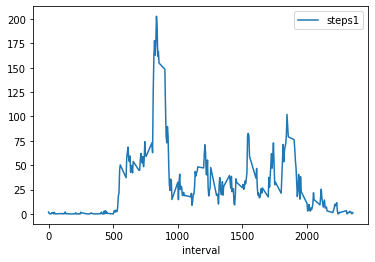

In [29]:
weekday_meanIntervalForNAData2 = weekday_meanIntervalForNAData1.groupby(['interval'],as_index=False).agg(lambda x : x.mean() if x.dtype=='int' else x.head(1))
weekday_meanIntervalForNAData2.plot(x="interval", y="steps1", kind="line")

References
* [Find maximum value of a column and return the corresponding row values using Pandas](https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan)
* [Histogram ggplot : Show count label for each bin for each category](https://stackoverflow.com/questions/30057765/histogram-ggplot-show-count-label-for-each-bin-for-each-category)
* [Count all NaNs in a pandas DataFrame](https://stackoverflow.com/questions/56261130/count-all-nans-in-a-pandas-dataframe)
* [Tick labels overlap in pandas bar chart](https://stackoverflow.com/questions/50675920/tick-labels-overlap-in-pandas-bar-chart)
* [How to convert string to datetime format in pandas python?](https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python)
* [Pandas Dataframe: Replacing NaN with row average](https://stackoverflow.com/questions/33058590/pandas-dataframe-replacing-nan-with-row-average)
* [Create a day-of-week column in a Pandas dataframe using Python](https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python)